This is an example notebook where we are considering a dataset thay includes tweets and news articles on the Russia-Ukraine War

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

filename = "../data/tweets_main_sentiment.csv"
df = pd.read_csv(filename)

In [5]:
df

,id,username,content,sentiment
0,1663696515326517248,The_NewDispatch,Ukraine Shoots Down 52 Of 54 Iranian Made Dron...,negative
1,1663696124392136705,KabalexChild,"Legion ""Freedom of Russia"" recruits thousands ...",negative
2,1663695373485973504,GuardianAus,Russia-Ukraine war at a glance: what we know o...,neutral
3,1663695317819351041,VSNRadio,Russia-Ukraine war at a glance: what we know o...,neutral
4,1663694952424169475,tdhoanh,Drone strikes in capital bring Ukraine war to ...,negative
...,...,...,...,...
5820,1662868597406945281,geoengineering1,"“For the AMO, the low contrast between the col...",neutral
5821,1662868537973563396,geoengineering1,"“In contrast, the spatial anomaly pattern chan...",neutral
5822,1662868477219053570,geoengineering1,“The projected spatial patterns of SST anomaly...,neutral
5823,1662868441253007362,mongi_writes,Let’s face it developers. Global warming has g...,neutral


Exploring the collected dataset and also making some basic visualisations

In [7]:
df.describe()

,id
count,5.825000e+03
mean,1.662840e+18
std,1.053056e+16
min,1.131165e+18
25%,1.663101e+18
50%,1.663284e+18
75%,1.663552e+18
max,1.663697e+18


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5825 entries, 0 to 5824
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         5825 non-null   int64 
 1   username   5825 non-null   object
 2   content    5825 non-null   object
 3   sentiment  5825 non-null   object
dtypes: int64(1), object(3)
memory usage: 182.2+ KB


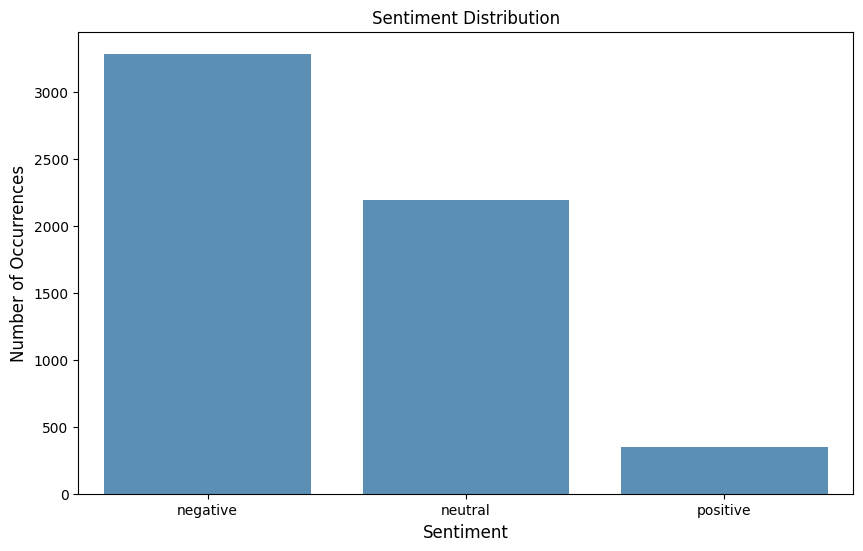

In [9]:
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=sentiment_counts.index,y=sentiment_counts.values, alpha=0.8)
plt.title('Sentiment Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Sentiment', fontsize=12)
plt.show()

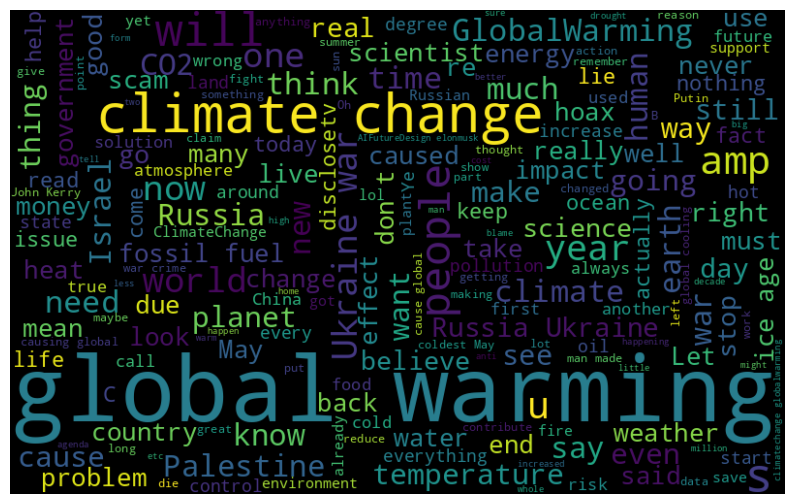

In [10]:
all_text = ' '.join(df['content'])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

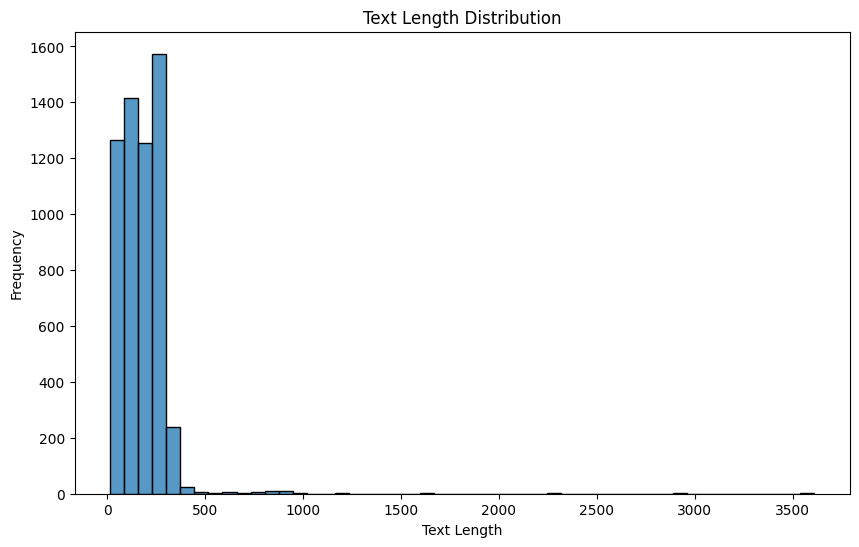

In [11]:
df['text_length'] = df['content'].apply(len)

# Histogram
plt.figure(figsize=(10,6))
sns.histplot(df['text_length'], bins=50)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

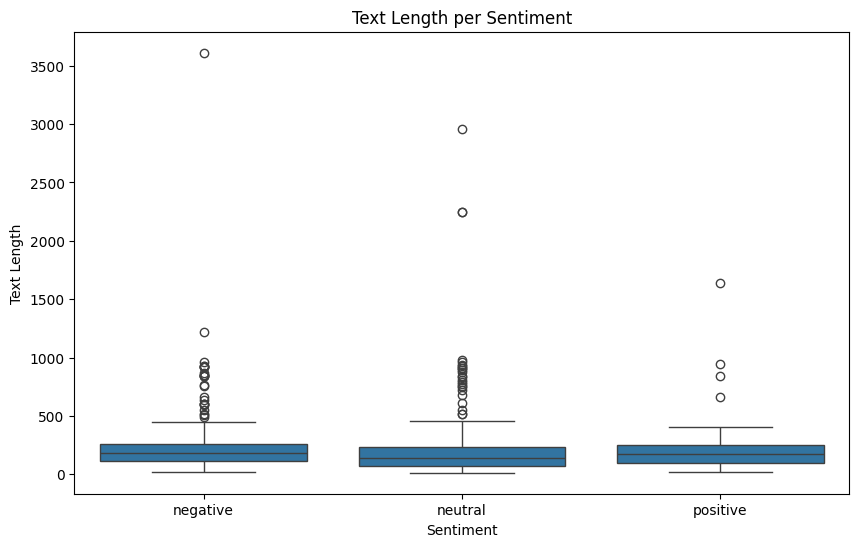

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x='sentiment', y='text_length', data=df)
plt.title('Text Length per Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Text Length')
plt.show()

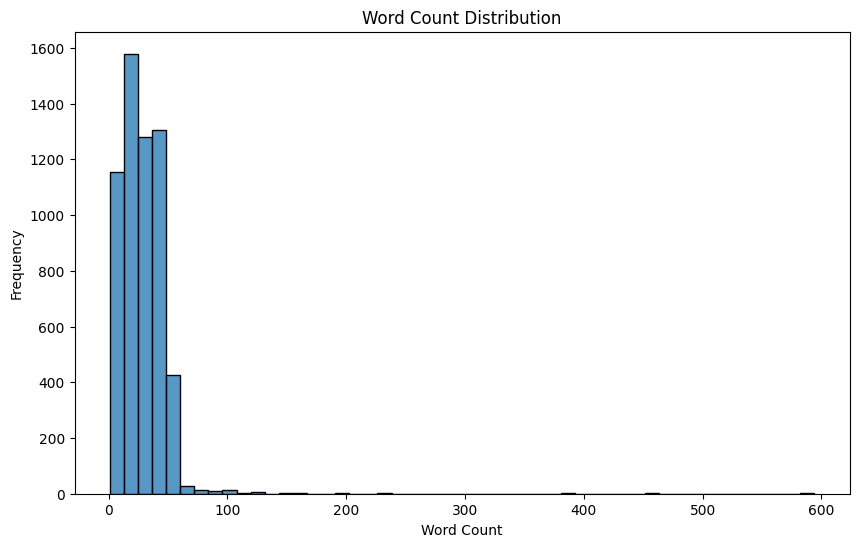

In [13]:
df['word_count'] = df['content'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10,6))
sns.histplot(df['word_count'], bins=50)
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

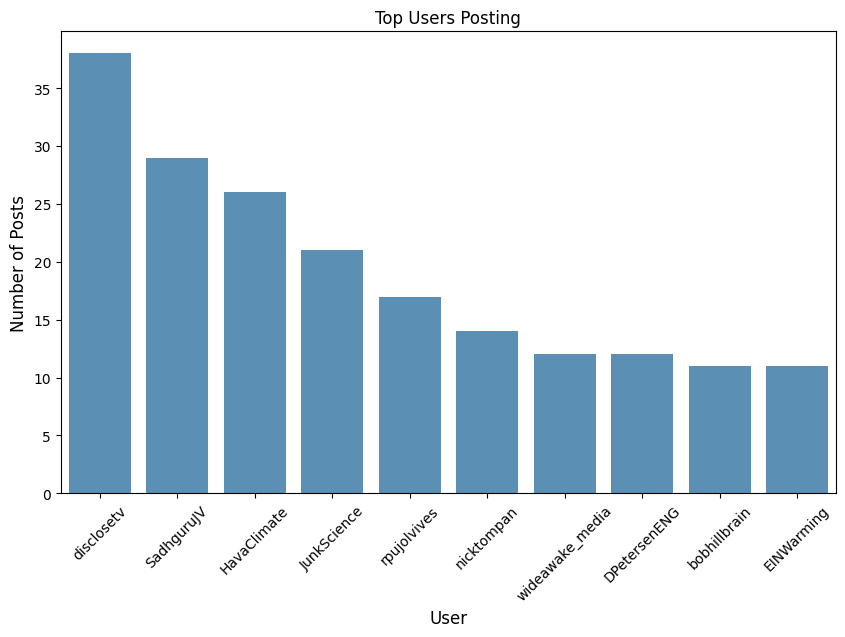

In [14]:
user_counts = df['username'].value_counts().head(10)

# Bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=user_counts.index, y=user_counts.values, alpha=0.8)
plt.title('Top Users Posting')
plt.ylabel('Number of Posts', fontsize=12)
plt.xlabel('User', fontsize=12)
plt.xticks(rotation=45)
plt.show()

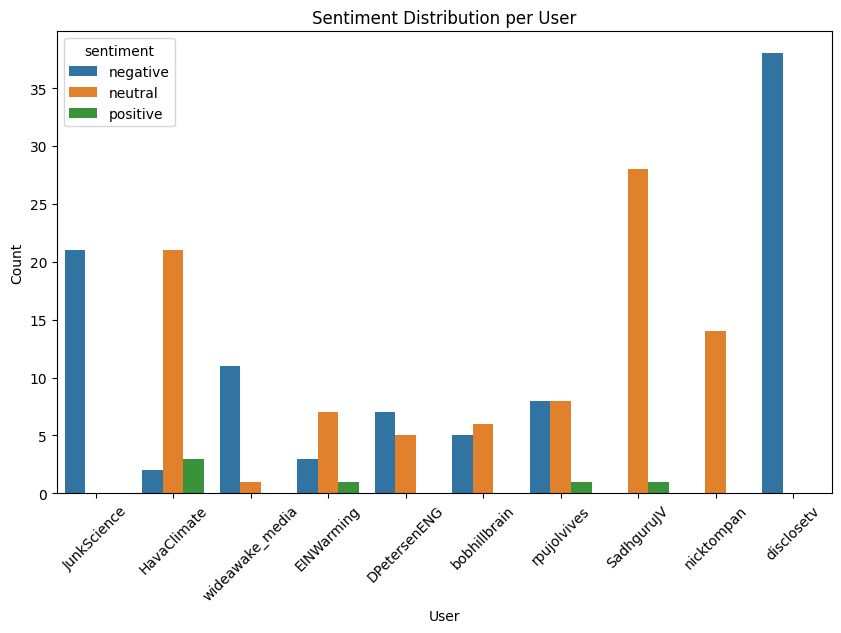

In [15]:
top_users_df = df[df['username'].isin(user_counts.index)]

plt.figure(figsize=(10,6))
sns.countplot(x='username', hue='sentiment', data=top_users_df)
plt.title('Sentiment Distribution per User')
plt.xlabel('User')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

We will now start training the model. Importing all libraries needed to train the model

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

Preprocess text data

In [17]:
df['content'] = df['content'].apply(lambda x: x.lower())  # convert to lowercase

le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])

Split data into training and testing sets

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df['content'], df['sentiment'], test_size=0.2, random_state=42)

Create a pipeline   

1. ('tfidf', TfidfVectorizer(stop_words='english')): This step will transform the text data into a numerical format that can be understood by the machine learning model. It uses the TF-IDF (Term Frequency-Inverse Document Frequency) method, which reflects how important a word is to a document in a collection or corpus. The stop_words='english' argument tells the vectorizer to ignore common English words like 'is', 'the', 'and', etc.

2. ('clf', LogisticRegression(solver='liblinear')): This step will apply a logistic regression classifier to the transformed data. Logistic regression is a statistical model used for binary classification problems. The solver='liblinear' argument specifies the algorithm to use for optimization. 'liblinear' is a good choice for small datasets and binary classification.



In [19]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression(solver='liblinear')),
])

In [21]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('clf', LogisticRegression(solver='liblinear'))])

In [22]:
y_pred = pipeline.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.6892703862660944
Precision: 0.7040566309616875
Recall: 0.6892703862660944
F1 Score: 0.6619107061736167


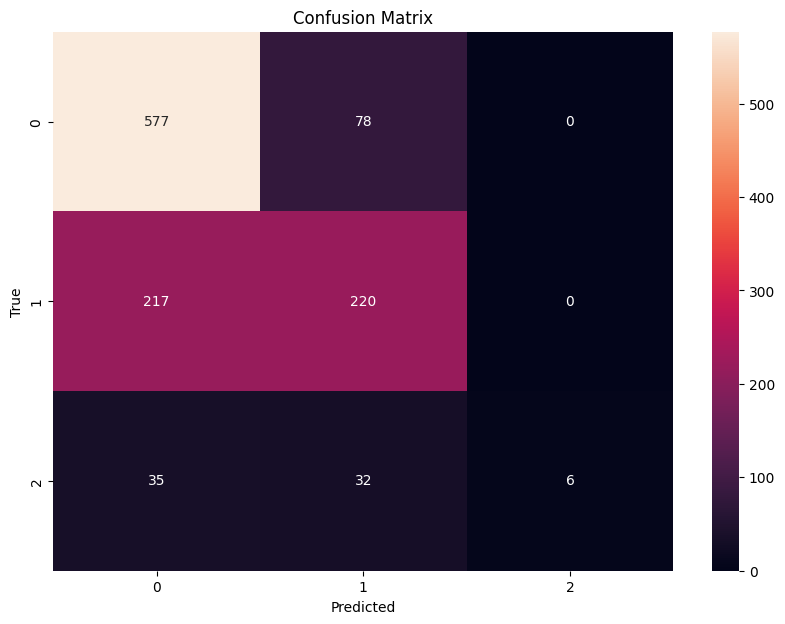

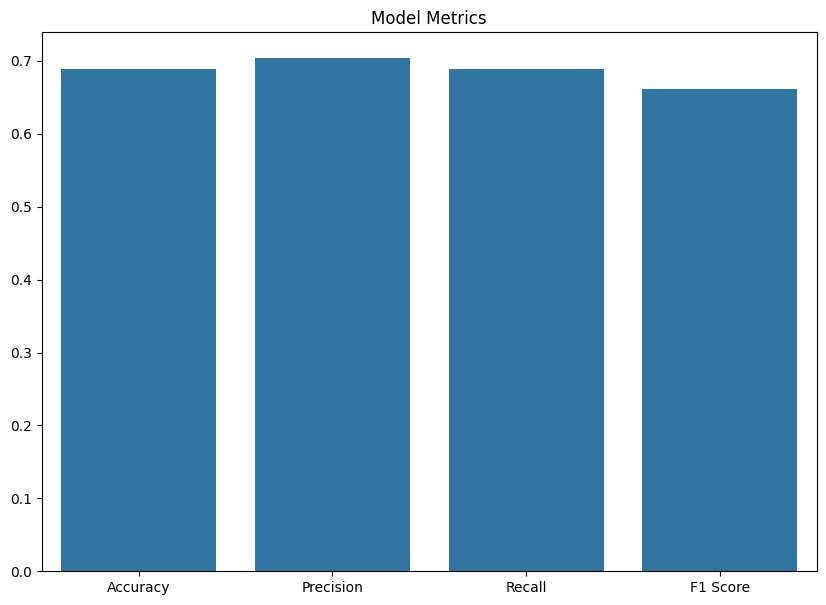

In [25]:
from sklearn.metrics import confusion_matrix
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Extract values from classification report
report_dict = classification_report(y_test, y_pred, output_dict=True)
precision = report_dict['weighted avg']['precision']
recall = report_dict['weighted avg']['recall']
f1 = report_dict['weighted avg']['f1-score']

# Plot metrics as a bar chart
metrics = [accuracy_score(y_test, y_pred), precision, recall, f1]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(10, 7))
sns.barplot(x=metric_names, y=metrics)
plt.title('Model Metrics')
plt.show()

Saving the model

In [26]:
from joblib import dump

dump(pipeline, '../models/sklearn_model.joblib') 

['../models/sklearn_model.joblib']